In [3]:
import tensorflow as t
from keras.datasets import imdb
from keras import models,layers, optimizers
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [4]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()

In [51]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [8]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

## Distribution of lengths of all reviews

In [10]:
import matplotlib
import matplotlib.pyplot as plt

plt.hist([len(i) for i in train_data])


(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <a list of 10 Patch objects>)

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
        
    return results
        

In [28]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(np.asarray(train_labels).astype("float32"))
y_test = to_categorical(np.asarray(test_labels).astype("float32"))

array([0, 1, 1, ..., 0, 0, 0])

## Building the Network Architecture

In [13]:
network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
network.add(layers.Dense(16,activation="relu"))
network.add(layers.Dense(2,activation="softmax"))
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="categorical_crossentropy",metrics=['accuracy'])

## Creating the Validation Set

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training the Model

In [15]:
history = network.fit(partial_x_train,
                      partial_y_train,
                      epochs=8,
                      batch_size=5,
                      validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/8
15000/15000 [==============================] - 8s 537us/step - loss: 0.3449 - acc: 0.8582 - val_loss: 0.2970 - val_acc: 0.8795
Epoch 2/8
15000/15000 [==============================] - 7s 487us/step - loss: 0.2355 - acc: 0.9097 - val_loss: 0.2774 - val_acc: 0.8913  - ETA: 1s - loss: 0.2325 - acc: 0.910 - ETA
Epoch 3/8
15000/15000 [==============================] - 7s 440us/step - loss: 0.2060 - acc: 0.9248 - val_loss: 0.2942 - val_acc: 0.8902: 4s - loss: 0.2050 - acc:  - ETA: 3s - loss: 0. - ETA: 2s - loss: 0.2018 - acc: 0. - ETA: 2s - l - ETA: 1s - loss: 0.2035 - - ETA: 0s - loss: 0.2027 - acc: - ETA: 0s - loss: 0.2036 -
Epoch 4/8
15000/15000 [==============================] - 6s 431us/step - loss: 0.1871 - acc: 0.9367 - val_loss: 0.3028 - val_acc: 0.8907
Epoch 5/8
15000/15000 [==============================] - 7s 436us/step - loss: 0.1647 - acc: 0.9456 - val_loss: 0.3349 - val_acc: 0.8881154 - ETA: 1s - loss: 0.1574 - ac - ET

## Plotting the Training and Validation Loss

In [16]:
import matplotlib.pyplot as plt

In [17]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]


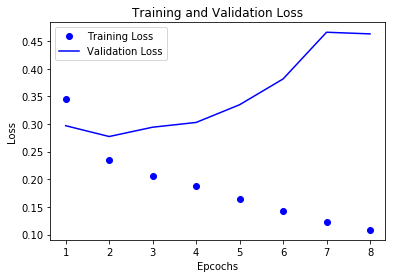

In [18]:
epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epcochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Plotting the Training and Validation Accuracy

In [19]:
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

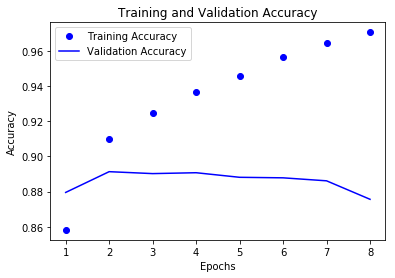

In [20]:
acc_values  = history_dict["acc"]
val_acc_values = history_dict["val_acc"]
plt.clf()
plt.plot(epochs, acc_values, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [29]:
pred_labels = np.argmax(network.predict(x_test),axis=1)

In [49]:
(np.sum(np.array(pred_labels) == np.array(test_labels)).astype("float32")/25000) * 100


85.61999999999999